In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
plt.style.use('science')


In [2]:
df = pd.read_csv("data/results_rq2.csv")

In [3]:
values_bloated = df["vulnerable_dependencies_bloated"].sum()
values_not_bloated = df["vulnerable_dependencies_reachable"].sum()

values_not_bloated_through_functions = df["vulnerable_dependencies_reachable_through_functions"].sum()
values_bloated_through_functions= df["vulnerable_dependencies_bloated_through_functions"].sum()
values_unresolved_through_functions= df["vulnerable_dependencies_unresolved_through_functions"].sum()
total_not_bloated = values_not_bloated_through_functions+values_bloated_through_functions+values_unresolved_through_functions


In [4]:
assert total_not_bloated == values_not_bloated


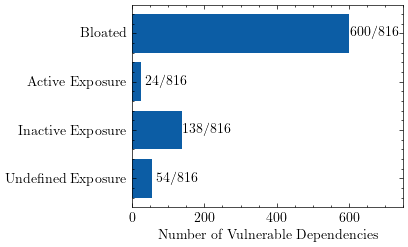

In [5]:
labels = ['Bloated', 'Active Exposure', 'Inactive Exposure', 'Undefined Exposure']
counts = [
    values_bloated,
    values_not_bloated_through_functions,
    values_bloated_through_functions, 
    values_unresolved_through_functions]

total = sum(counts)  
fig, ax = plt.subplots()

# Create bars
bars = ax.barh(labels, counts)

# Annotations
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}/{total}', 
                xy=(width + 70, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center',
                color='black')

ax.set_xlim(0, max(counts) + 150)  # Adjust x-axis limits to account for width/total display
ax.set_xlabel('Number of Vulnerable Dependencies')

plt.gca().invert_yaxis()  # This inverts the y-axis to have the bar with the highest count at the top

plt.savefig("figures/rq2.pdf", bbox_inches='tight')
plt.show()